In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.5

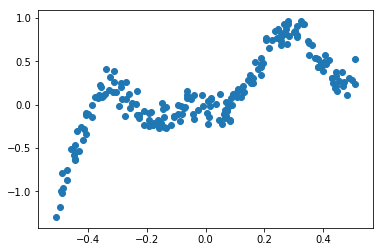

In [3]:
plt.scatter(x, y)

In [4]:
xx = np.linspace(min(x), max(x), num=200)

In [5]:
x_data = x.reshape(-1,1)
y_data = y.reshape(-1,1)

## Non Residual Network

In [6]:
import mylibrary.nnlib as tnn

In [13]:
optimizer = tnn.Adam()

# bias = tnn.BiasLayer(1, optimizer=optimizer)
bias = tnn.LinearLayer(1,1, optimizer=optimizer)
out1 = tnn.DoubleRelu()
linear = tnn.LinearLayer(2, 1,optimizer=optimizer)
linear.weights = np.zeros_like(linear.weights)

net1 = tnn.AutoForm()
net1.collect_global_layers()


%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):
    a1 = net1.forward(x_data)
    
    loss = tnn.MseLoss.loss(a1, y_data)
    dy = tnn.MseLoss.del_loss(a1, y_data)
    
    dx = net1.backward(dy)
    
    net1.update()
    
    if step % 100 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
        plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
        plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
        plt.plot(x, np.zeros_like(x), c='b', lw=2)
#         plt.scatter(x, da1.reshape(-1), marker='.', c='y', lw=1, label='x,da1')
        plt.legend()
        
        fig.canvas.draw()
        
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 0.09809135362818878

_______________________
epoch 100
Loss 0.04178527640437617

_______________________
epoch 200
Loss 0.041772848132522966

_______________________
epoch 300
Loss 0.041772675700884415

_______________________
epoch 400
Loss 0.04177267462124784

_______________________
epoch 500
Loss 0.04177267362005182

_______________________
epoch 600
Loss 0.04177267247358378

_______________________
epoch 700
Loss 0.04177267118084034

_______________________
epoch 800
Loss 0.0417726697385139

_______________________
epoch 900
Loss 0.041772668141461564

_______________________
epoch 1000
Loss 0.041772666382944454

_______________________
epoch 1100
Loss 0.04177266445473827

_______________________
epoch 1200
Loss 0.04177266234716485

_______________________
epoch 1300
Loss 0.04177266216355036

_______________________
epoch 1400
Loss 0.041772662171359796

_______________________
epoch 1500
Loss 0.04177266216041337

_______________________
epoch 16

TclError: invalid command name "pyimage144"

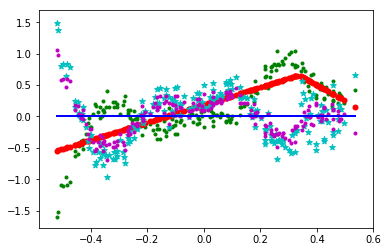

In [8]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.scatter(x, dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
plt.plot(x, np.zeros_like(x), c='b', lw=2)

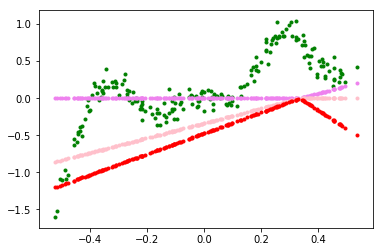

In [9]:
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, linear.input[:,0], marker='.', c='violet', label='x,a1')
plt.scatter(x, linear.input[:,1], marker='.', c='pink', label='x,a1')
plt.scatter(x, linear.zee-linear.bias, marker='.', c='r', label='x,a2')

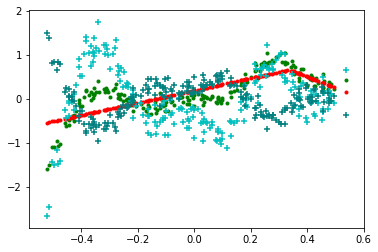

In [10]:
plt.scatter(x, y, marker='.', c='g', label='x,y')
# plt.scatter(x, linear.input[:,0], marker='.', c='violet', label='x,a1')
# plt.scatter(x, linear.input[:,1], marker='.', c='pink', label='x,a1')
plt.scatter(x, linear.zee, marker='.', c='r', label='x,a2')
plt.scatter(x, out1.del_output[:,0], marker='+', c='c', label='x,da1')
plt.scatter(x, out1.del_output[:,1], marker='+', c='teal', label='x,da1')

(0.00692668233581392, 0.04579932619965407)

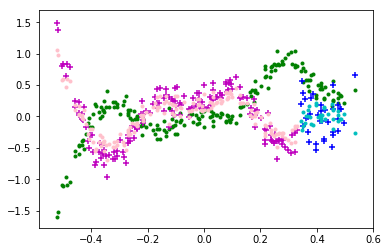

In [11]:
plt.scatter(x, y, marker='.', c='g', label='x,y')
mask = out1.x >= 0.
plt.scatter(x[mask.reshape(-1)], bias.del_output[mask], marker='+', c='b', label='x,da1')
plt.scatter(x[~mask.reshape(-1)], bias.del_output[~mask], marker='+', c='m', label='x,da1')
plt.scatter(x[mask.reshape(-1)], dy[mask], marker='.', c='c', label='x,a1')
plt.scatter(x[~mask.reshape(-1)], dy[~mask], marker='.', c='pink', label='x,a1')
error1 = tnn.MseLoss().loss(a1[mask], y_data[mask])
error2 = tnn.MseLoss().loss(a1[~mask], y_data[~mask])
error1, error2

In [50]:
# doing for splitted data
x_new = out1.x[out1.x <0].reshape(-1,1)
y_new = y_data[out1.x <0].reshape(-1,1)
# xnmean = x_new.mean()
# ynmean = y_new.mean()
# x_new = x_new - xnmean
# y_new = y_new - ynmean

In [53]:
bl1 = tnn.BiasLayer(1, optimizer=optimizer)
dr1 = tnn.DoubleRelu()
ll1 = tnn.LinearLayer(2, 1,optimizer=optimizer)
# ll1.weights = np.zeros_like(ll1.weights)

net2 = tnn.AutoForm()
net2.layerList = [bl1, dr1, ll1]

In [54]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):
    a1 = net2.forward(x_new)
    
    loss = tnn.MseLoss.loss(a1, y_new)
    dy = tnn.MseLoss.del_loss(a1, y_new)
    
    dx = net2.backward(dy)
    
    net2.update()
    
    if step % 100 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)
        print(ll1.weights)

        ax.clear()
        plt.scatter(x_new.reshape(-1), y_new.reshape(-1), marker='.', c='g', label='x,y')
        plt.scatter(x_new.reshape(-1), a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
        plt.scatter(x_new.reshape(-1), dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
        plt.scatter(x_new.reshape(-1), dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
        plt.plot(x_new.reshape(-1), x_new*0., c='b', lw=2)
#         plt.scatter(x, da1.reshape(-1), marker='.', c='y', lw=1, label='x,da1')
        plt.legend()
        
        fig.canvas.draw()
        
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 0.30748149312710993
[[ 0.58846868]
 [-1.08669861]]

_______________________
epoch 100
Loss 0.05817889341190812
[[ 1.50727745]
 [-0.65243779]]

_______________________
epoch 200
Loss 0.05323761882637196
[[ 1.8806849 ]
 [-0.51623653]]

_______________________
epoch 300
Loss 0.049334911174597956
[[ 2.20620535]
 [-0.33130224]]

_______________________
epoch 400
Loss 0.0461286870053454
[[ 2.43427415]
 [-0.11971576]]

_______________________
epoch 500
Loss 0.042811357536629346
[[2.67556284]
 [0.11354201]]

_______________________
epoch 600
Loss 0.03948738935270102
[[2.95026485]
 [0.34920811]]

_______________________
epoch 700
Loss 0.03697630495904811
[[3.24359448]
 [0.55680891]]

_______________________
epoch 800
Loss 0.035669569624811624
[[3.50726641]
 [0.69863268]]

_______________________
epoch 900
Loss 0.035231966095421265
[[3.70472227]
 [0.76901446]]

_______________________
epoch 1000
Loss 0.035089649635863314
[[3.84448922]
 [0.7895781 ]]

________

TclError: this isn't a Tk application

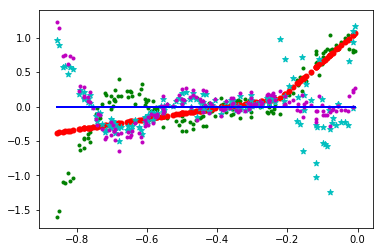

In [55]:
%matplotlib inline
plt.scatter(x_new.reshape(-1), y_new.reshape(-1), marker='.', c='g', label='x,y')
plt.scatter(x_new.reshape(-1), a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
plt.scatter(x_new.reshape(-1), dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.scatter(x_new.reshape(-1), dy.reshape(-1), marker='.', c='m', lw=1, label='x,dy')
plt.plot(x_new.reshape(-1), x_new*0., c='b', lw=2)

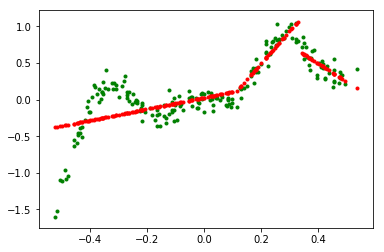

In [61]:
y_ = net1.forward(x_data)
mask = out1.x >=0
y_0 = y_*mask

x_1 = out1.x
y_1 = net2.forward(x_1)
y_1 = y_1*(~mask)
y_ = y_1 + y_0

plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, y_, marker='.', c='r', label='x,y')

In [62]:
# predicting the data locally gives discontinuous function